GHLADIN SHEBAC S R

GRIP SPARK FOUNDATION _ MAY-21

TASK 3 - Exploratory data analysis-Retail

DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP


In [ ]:
#importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb

In [ ]:
#importing the dataset
data = pd.read_csv('/content/SampleSuperstore.csv')

In [ ]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Handling missing data

In [ ]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Handling duplicate records

In [ ]:
duplicate = data.duplicated()
print(duplicate.sum())
data[duplicate]

17


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [ ]:
data.drop_duplicates(inplace=True)
dpl=data.duplicated()
dpl.sum()

0

Handling outliers

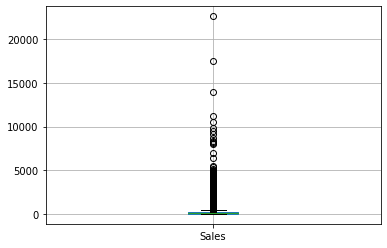

In [ ]:
data.boxplot(column=["Sales"])
plt.show()

Removing outliers

In [ ]:
def remove_outliers(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  IQR=q3-q1
  lower_range=q1-(1.5*IQR)
  upper_range=q3+(1.5*IQR)
  return lower_range,upper_range

In [ ]:
lowsales,upsales=remove_outliers(data['Sales'])
data['Sales']=np.where(data['Sales']>upsales,upsales,data['Sales'])
data['Sales']=np.where(data['Sales']<lowsales,lowsales,data['Sales'])

<function matplotlib.pyplot.show>

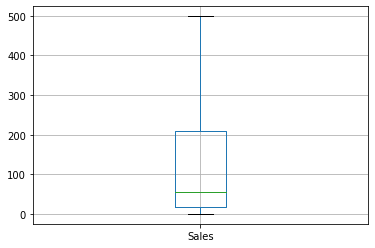

In [ ]:
data.boxplot(column=["Sales"])
plt.show

<function matplotlib.pyplot.show>

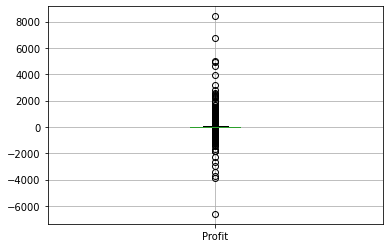

In [ ]:
data.boxplot(column=["Profit"])
plt.show

In [ ]:
lowprofit,upprofit=remove_outliers(data['Profit'])
data['Profit']=np.where(data['Profit']>upprofit,upprofit,data['Profit'])
data['Profit']=np.where(data['Profit']<lowprofit,lowprofit,data['Profit'])

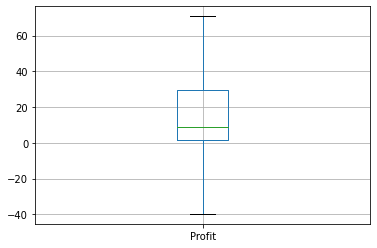

In [ ]:
data.boxplot(column=["Profit"])
plt.show()

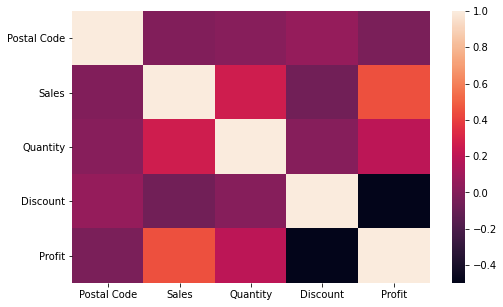

In [ ]:
fig,axes = plt.subplots(1,1,figsize = (8,5))
sb.heatmap(data.corr())
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 720x720 with 0 Axes>

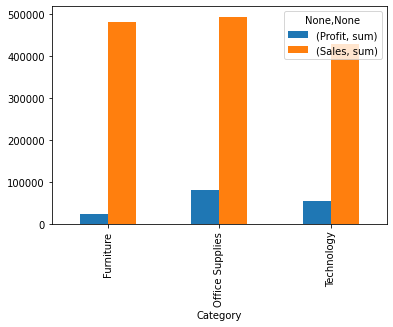

In [ ]:
plt.figure(figsize=(10,10))
data.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 720x720 with 0 Axes>

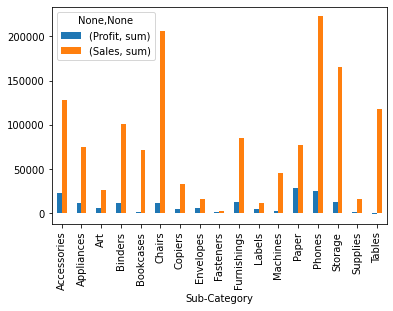

In [ ]:
plt.figure(figsize=(10,10))
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 1728x720 with 0 Axes>

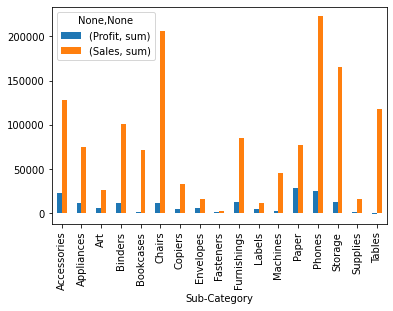

In [ ]:
plt.figure(figsize=(24,10))
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

<Figure size 1728x720 with 0 Axes>

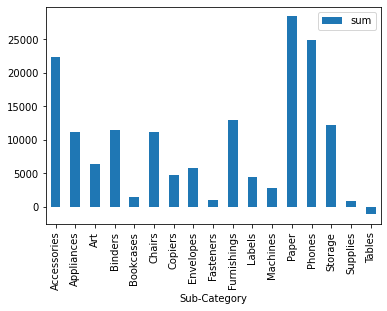

In [ ]:
plt.figure(figsize=(24,10))
data.groupby('Sub-Category')['Profit'].agg(['sum']).plot.bar()
plt.show()

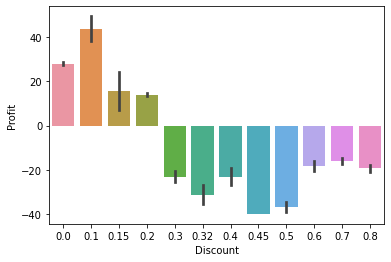

In [ ]:
sb.barplot(x=data.Discount,y=data.Profit)

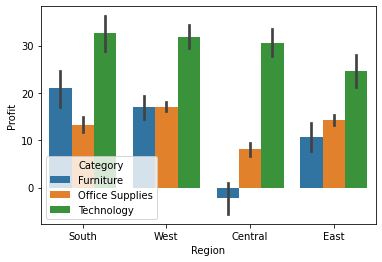

In [ ]:
sb.barplot(x=data.Region,y=data.Profit,hue=data.Category)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


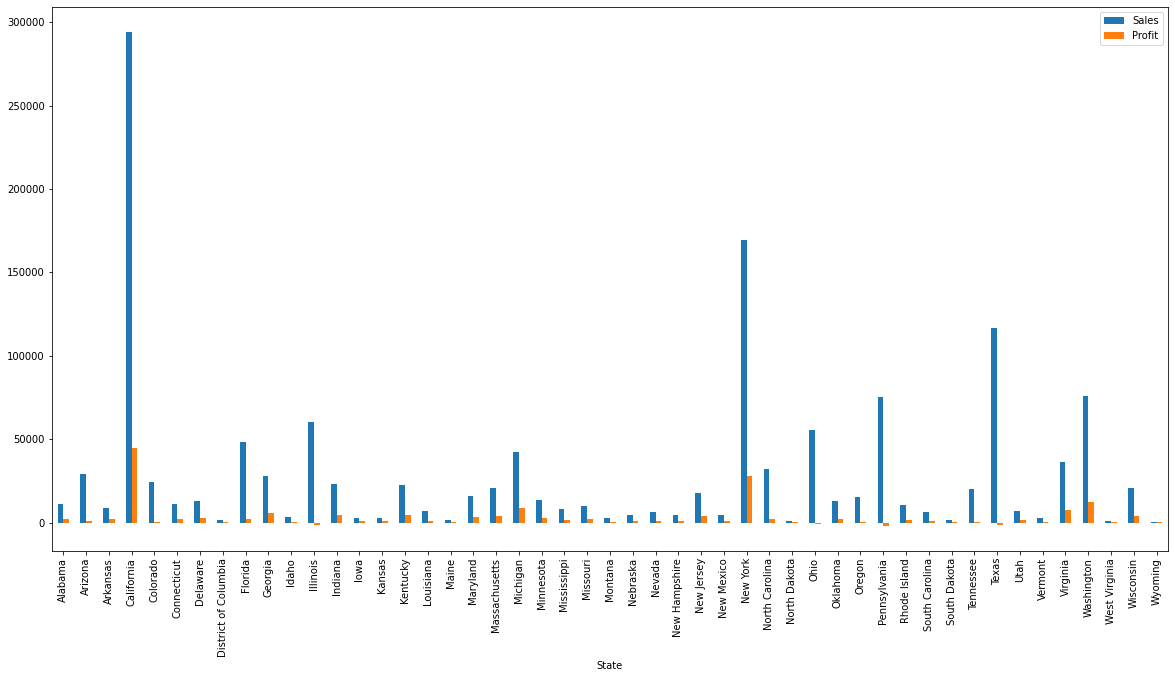

In [ ]:
dataplot=data.groupby(['State'])['Sales','Profit'].sum()
dataplot.plot.bar(figsize=(20,10))

In [ ]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [ ]:
(data['Ship Mode'].value_counts()/len(data['Ship Mode']))*100

Standard Class    59.687281
Second Class      19.474792
First Class       15.405432
Same Day           5.432495
Name: Ship Mode, dtype: float64

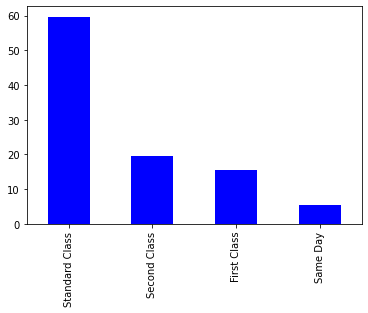

In [ ]:
((data['Ship Mode'].value_counts()/len(data['Ship Mode']))*100).plot(kind="bar",color="blue")

In [ ]:
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [ ]:
(data['Category'].value_counts()/len(data['Ship Mode']))*100

Office Supplies    60.258595
Furniture          21.228826
Technology         18.512579
Name: Category, dtype: float64

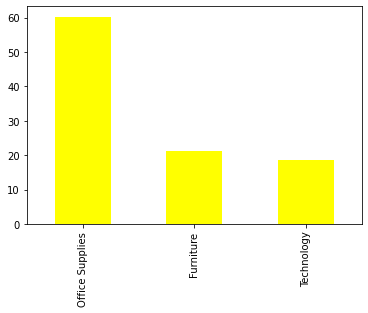

In [ ]:
((data['Category'].value_counts()/len(data['Ship Mode']))*100).plot(kind="bar",color="yellow")